In [2]:
#%pip install stochastic
from fbm import FBM
from fbm import fbm, fgn, times
import numpy as np
import pandas as pd
import processi_EMGIT as em
import stochastic as st
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf,adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
%matplotlib inline

In [3]:
H=[0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
g=[]
for h in H:
    g.append(em.gbm_rough(100,1,23400,h))

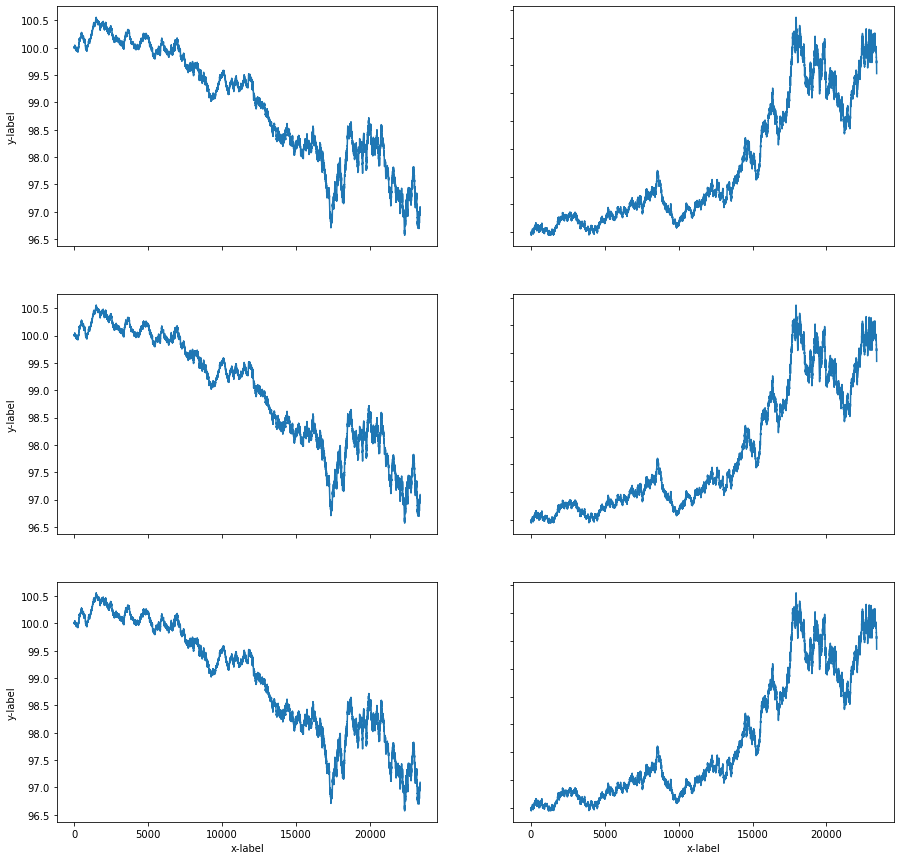

In [5]:

fig, axs = plt.subplots(3, 2,figsize=(15,15))

'''
axs[0, 0].plot(x, y)
#axs[0, 0].set_title('Axis [0, 0]')
axs[0, 1].plot(x, y, 'tab:orange')
#axs[0, 1].set_title('Axis [0, 1]')
axs[1, 0].plot(x, -y, 'tab:green')
#axs[1, 0].set_title('Axis [1, 0]')
axs[1, 1].plot(x, -y, 'tab:red')
#axs[1, 1].set_title('Axis [1, 1]')
'''

axs[0, 0].plot(g[0][0]) 
axs[0, 1].plot(g[0][1])
axs[1, 0].plot(g[5][0])
axs[1, 1].plot(g[5][1])
axs[2, 0].plot(g[8][0])
axs[2, 1].plot(g[8][1])


for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [ ]:
for i in range(len(g)):
    plt.plot(g[i][0])
    plt.show()
    plt.plot(g[i][1])
    plt.show()

In [6]:
def gbm_rough2(s0,T,N,h,seed=457778,gamma=1,alpha=1,theta=1,rho=-0.7,r=0):
    ''' corretta''' #giusto
    S=np.zeros(N)
    sigma=np.ones(N)
    y=np.ones(N)
    y[0]=0
    sigma[0]=1/100
    S[0]=s0
    fr=np.zeros(N)
    np.random.seed(seed)
    dt=T/N
    cov=np.matrix([[1, rho],[rho, 1]])
    a  =np.linalg.cholesky(cov)
    f = FBM(n=N, hurst=h, length=1, method='cholesky')
    fr=f.fbm()
    for i in range(1,len(S)):
        epsilon1=np.random.randn()
        epsilon2=fr[i]*a[1, 0]+ fr[i] * a[1, 1 ]       
        S[i] = S[i-1]+S[i-1]*sigma[i-1]*np.sqrt(dt)*epsilon1
        y[i] = (y[i-1] -gamma*y[i-1]*dt+ theta*np.sqrt(dt)*epsilon2)
        sigma[i] = np.exp(y[i])/100
    return [S,sigma]

In [6]:
y=gbm_rough2(100,1,23400,0.05)

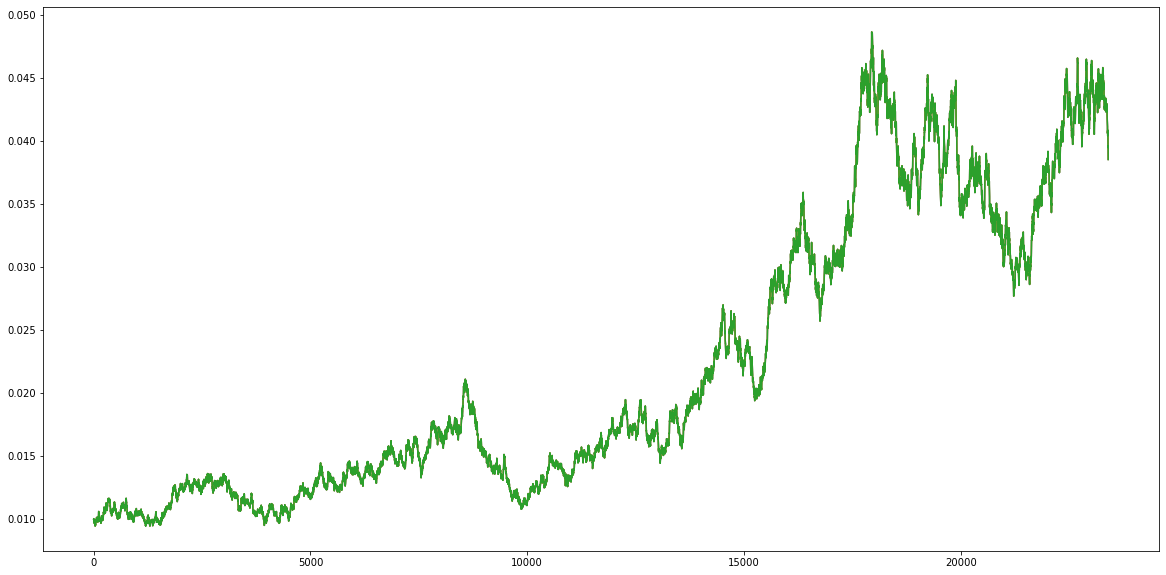

In [2]:
x1=em.gbm_rough(100,1,23400,0.05)
x2=em.gbm_rough(100,1,23400,0.5)
x3=em.gbm_rough(100,1,23400,0.8)

d=[]
for i in range(len(x1[0])):
    d.append(x1[1][i]-x3[1][i])
d
plt.figure(figsize=(20, 10))
plt.plot(x1[1])
plt.plot(x2[1])
plt.plot(x3[1])
plt.show()

In [2]:
def gbm_rough(s0,T,N,h,seed=457778,gamma=1,alpha=1,theta=1,rho=-0.7,r=0):
    ''' corretta''' #giusto
    S=np.zeros(N)
    sigma=np.ones(N)
    y=np.ones(N)
    y[0]=0
    sigma[0]=1/100
    S[0]=s0
    np.random.seed(seed)
    dt=T/N
    cov=np.matrix([[1, rho],[rho, 1]])
    a  =np.linalg.cholesky(cov)
    f = FBM(n=N, hurst=h, length=1, method='cholesky')
    for i in range(1,len(S)):
        #f = FBM(n=1, hurst=h, length=1, method='cholesky')
        #fr=f.fbm()
        epsilon1=np.random.randn()
        epsilon2=f.fbm()#*a[1, 0]+ f.fbm()[1]* a[1, 1 ]       
        S[i] = S[i-1]+S[i-1]*sigma[i-1]*np.sqrt(dt)*epsilon1
        y[i] = y[i-1] -gamma*y[i-1]*dt+ theta*np.sqrt(dt)*epsilon2
        sigma[i] = np.exp(y[i])/100
    return sigma

In [5]:
f = FBM(n=1, hurst=0.05, length=1, method='cholesky')
f.fbm()

array([ 0.       , -0.6744391])

In [6]:
a=gbm_rough(100,1,23400,0.03)
#b=gbm_rough(100,1,23400,0.3)
#c=gbm_rough(100,1,23400,0.5)
#d=gbm_rough(100,1,23400,0.8)

: 

In [56]:
a=[]
for i in range(5):
    f = FBM(n=1, hurst=0.03, length=1, method='daviesharte')
    a.append(f.fgn())
x=[]
H=[0.05, 0.1, 0.2, 0.3, 0.5]
for (i,h) in zip(range(5),H):
    x.append(gbm_rough(100,1,23400,h))
x

[array([0.01      , 0.00998641, 0.01006797, ..., 0.00570443, 0.00568932,
        0.00572841]),
 array([0.01      , 0.00998641, 0.01006797, ..., 0.00570443, 0.00568932,
        0.00572841]),
 array([0.01      , 0.00998641, 0.01006797, ..., 0.00570443, 0.00568932,
        0.00572841]),
 array([0.01      , 0.00998641, 0.01006797, ..., 0.00570443, 0.00568932,
        0.00572841]),
 array([0.01      , 0.00998641, 0.01006797, ..., 0.00570443, 0.00568932,
        0.00572841])]